<a href="https://colab.research.google.com/github/Yevhenii-Taran-9/Machine-Learning/blob/main/%D0%A2%D0%B0%D1%80%D0%B0%D0%BD_%D0%BF%D1%80_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Виконав:** **Таран Євгеній ФІТ** 4-9

# **Завдання 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## Завантажити датасет Ірис

In [6]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

## Роздрукувати перші 5 рядочків

In [7]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Метод ліктя

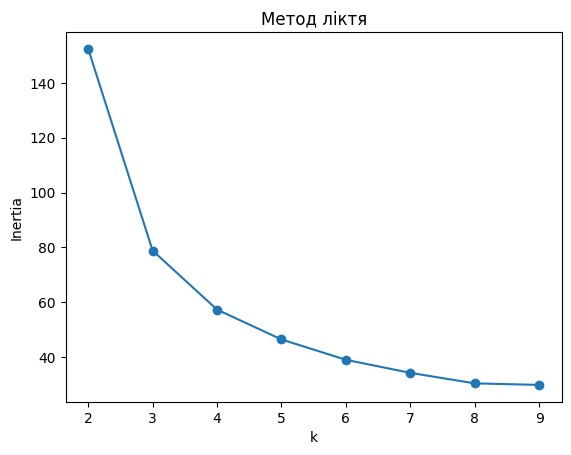

In [8]:
inertia = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Метод ліктя")
plt.show()

## Метод силуетів

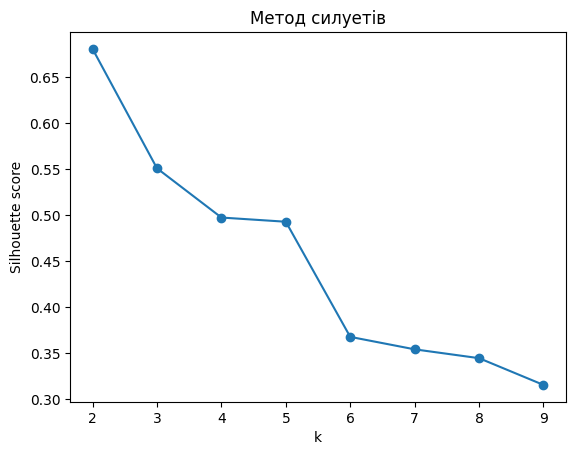

In [9]:
sil = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df)
    sil.append(silhouette_score(df, labels))

plt.plot(K, sil, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Метод силуетів")
plt.show()


## Оптимальна кількість кластерів

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k = max(
    ((k, silhouette_score(df, KMeans(n_clusters=k, random_state=42).fit_predict(df)))
     for k in range(2,11)),
    key=lambda x: x[1]
)[0]
print("Оптимальна кількість кластерів:", best_k)

Оптимальна кількість кластерів: 2


## Візуалізація кластерів

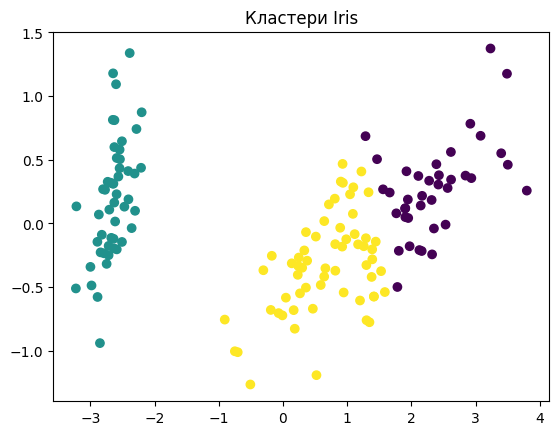

In [10]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(df)

pca = PCA(n_components=2)
components = pca.fit_transform(df)

plt.scatter(components[:,0], components[:,1], c=labels, cmap="viridis")
plt.title("Кластери Iris")
plt.show()


# Завдання 2

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Student_data.csv to Student_data (1).csv


In [14]:
df = pd.read_csv(list(uploaded.keys())[0])
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## Попередній аналіз даних

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [17]:
df.isnull().sum()

,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df = df.fillna(df.mean())

In [20]:
df = df.drop_duplicates()

In [21]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


## Визначаємо тип задачі

In [22]:
target = df.columns[-1]
print("Цільова змінна:", target)

print("Унікальні значення:", df[target].nunique())

Цільова змінна: GradeClass
Унікальні значення: 5


тип задачі: класифікація

## Побудова моделей

In [24]:
models = {
    "LogReg": LogisticRegression(max_iter=500),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"\n{name}: {accuracy_score(y_test, pred)*100:.2f}%")


LogReg: 69.73%

SVM: 78.29%

RandomForest: 91.86%


## Підбір параметрів

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(LogisticRegression(max_iter=500), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Найкращі параметри:", grid.best_params_)

Найкращі параметри: {'C': 10}


## Метод ліктя

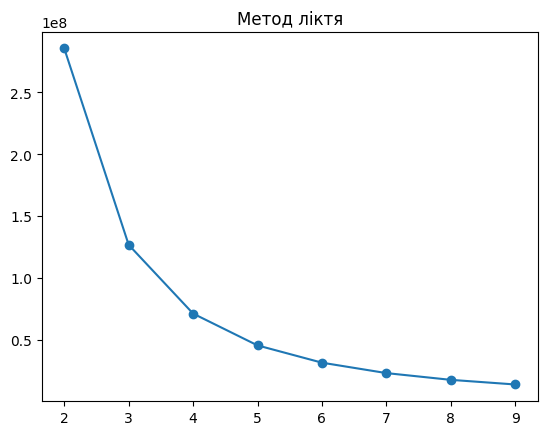

In [26]:
inertia = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df.drop(target, axis=1))
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.title("Метод ліктя")
plt.show()

## Метод силуетів

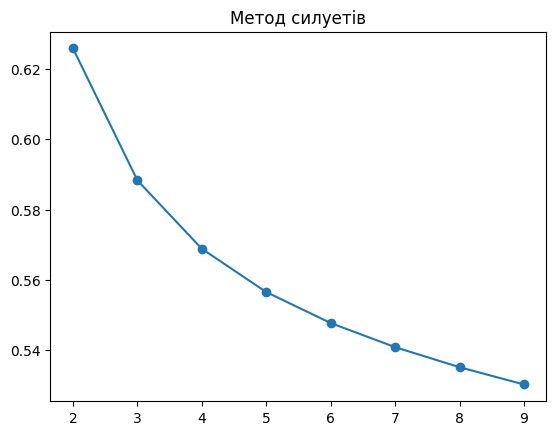

In [27]:
sil = []

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df.drop(target, axis=1))
    sil.append(silhouette_score(df.drop(target, axis=1), labels))

plt.plot(K, sil, marker='o')
plt.title("Метод силуетів")
plt.show()


## Візуалізація кластерів

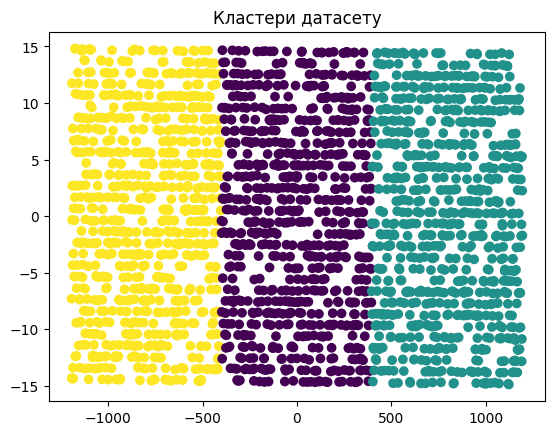

In [28]:
pca = PCA(n_components=2)
comp = pca.fit_transform(df.drop(target, axis=1))

km = KMeans(n_clusters=3)
lab = km.fit_predict(df.drop(target, axis=1))

plt.scatter(comp[:,0], comp[:,1], c=lab, cmap="viridis")
plt.title("Кластери датасету")
plt.show()


# Висновки

### У цій лабораторній роботі я на практиці переконався, як методи ліктя та силуетів реально допомагають знайти логічну структуру даних: у випадку Iris обидва підходи природно привели до k=3, що повністю співпало з реальними видами ірисів і підтвердилось на PCA-візуалізації. У другому завданні було цікаво пройти повний цикл роботи з датасетом: перевірити пропуски, почистити дані, видалити дублікати, оцінити статистику, визначити тип задачі та порівняти моделі. Підбір параметрів показав, наскільки сильно гіперпараметри впливають на якість класифікації, а кластеризація цього ж набору дозволила поглянути на структуру даних уже з іншого, «безвчительного» боку. Зрештою, робота показала, що якісна підготовка даних, аналіз та правильний вибір кількості кластерів критично впливають на результат, а сам процес кластеризації — це не просто запуск алгоритму, а поєднання інтуїції, статистики та візуального аналізу.